# Caso práctico: Resolución de un caso práctico sobre regresión

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
url = "hour.csv"
datasethorario = pd.read_csv(url)
url = "day.csv"
datasetdiario = pd.read_csv(url)

## Vemos el numero de instancias y de columnas

In [3]:
datasetdiario.shape

(731, 16)

In [4]:
datasethorario.shape

(17379, 17)

## Eliminamos las columnas id, instant, dteday,yr ,mnth, hr y convertimos weathersit y season de categorica a numerica

In [5]:

datasethorario.pop('instant')
datasethorario.pop('dteday')
datasethorario.pop('casual')
datasethorario.pop('registered')

datasetdiario.pop('instant')
datasetdiario.pop('dteday')
datasetdiario.pop('casual')
datasetdiario.pop('registered')

season = datasethorario.pop('season')
#1:springer, 2:summer, 3:fall, 4:winter

datasethorario['spring'] = (season==1)*1.0
datasethorario['summer'] = (season==2)*1.0
datasethorario['fall']   = (season==3)*1.0
datasethorario['winter'] = (season==4)*1.0

weathersit=datasethorario.pop('weathersit')
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

datasethorario['clear']     = (weathersit==1)*1.0
datasethorario['mist']      = (weathersit==2)*1.0
datasethorario['lightsnow'] = (weathersit==3)*1.0
datasethorario['heavyrain'] = (weathersit==4)*1.0

season = datasetdiario.pop('season')
#1:springer, 2:summer, 3:fall, 4:winter

datasetdiario['spring'] = (season==1)*1.0
datasetdiario['summer'] = (season==2)*1.0
datasetdiario['fall']   = (season==3)*1.0
datasetdiario['winter'] = (season==4)*1.0

weathersit=datasetdiario.pop('weathersit')
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

datasetdiario['clear']     = (weathersit==1)*1.0
datasetdiario['mist']      = (weathersit==2)*1.0
datasetdiario['lightsnow'] = (weathersit==3)*1.0
datasetdiario['heavyrain'] = (weathersit==4)*1.0




## Vemos los datos nuevos       

In [6]:
datasetdiario.sample(n=10)


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,clear,mist,lightsnow,heavyrain
510,1,5,0,5,1,0.680000,0.627529,0.747083,0.140550,6734,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
710,1,12,0,2,1,0.353333,0.338363,0.596667,0.296037,5501,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
117,0,4,0,4,1,0.617500,0.578929,0.700833,0.320908,4058,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
534,1,6,0,1,1,0.568333,0.544842,0.777917,0.174746,5099,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
722,1,12,0,0,0,0.245833,0.259471,0.515417,0.133083,1787,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
726,1,12,0,4,1,0.254167,0.226642,0.652917,0.350133,2114,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319,0,11,0,3,1,0.456667,0.451988,0.930000,0.136829,1817,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79,0,3,0,1,1,0.430435,0.409735,0.737391,0.288783,2077,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
350,0,12,0,6,0,0.258333,0.249371,0.560833,0.243167,2739,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
193,0,7,0,3,1,0.746667,0.689404,0.631667,0.146133,4342,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
datasethorario.sample(n=10)

,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,clear,mist,lightsnow,heavyrain
3571,0,6,17,0,4,1,0.76,0.6515,0.20,0.5224,572,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6425,0,9,7,0,5,1,0.52,0.5000,0.83,0.2239,297,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
671,0,1,7,0,1,1,0.16,0.1364,0.64,0.2836,72,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1343,0,3,6,0,2,1,0.20,0.1818,0.59,0.2985,46,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4805,0,7,3,0,0,0,0.80,0.7879,0.63,0.0896,37,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14232,1,8,5,0,2,1,0.56,0.5303,0.83,0.0896,34,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
17093,1,12,0,0,4,1,0.32,0.3333,0.61,0.1343,42,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
15756,1,10,17,0,2,1,0.68,0.6364,0.41,0.0000,938,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3156,0,5,10,0,1,1,0.62,0.6061,0.65,0.0896,112,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15033,1,9,14,0,0,0,0.60,0.6212,0.38,0.1940,666,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Describimos los datos

In [8]:
datasetdiario.describe()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,clear,mist,lightsnow,heavyrain
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,4504.348837,0.247606,0.251710,0.257182,0.243502,0.633379,0.337893,0.028728,0.0
std,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,1937.211452,0.431917,0.434293,0.437380,0.429489,0.482212,0.473316,0.167155,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,3152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,5956.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0
max,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [9]:
datasethorario.describe()

,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,clear,mist,lightsnow,heavyrain
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,189.463088,0.244088,0.253697,0.258703,0.243512,0.656712,0.261465,0.081650,0.000173
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,181.387599,0.429557,0.435139,0.437935,0.429214,0.474820,0.439445,0.273839,0.013138
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,281.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Comprobamos que no haya valores missings

In [10]:
datasethorario.isnull().any()

yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
spring        False
summer        False
fall          False
winter        False
clear         False
mist          False
lightsnow     False
heavyrain     False
dtype: bool

In [11]:
datasetdiario.isnull().any()

yr            False
mnth          False
holiday       False
weekday       False
workingday    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
spring        False
summer        False
fall          False
winter        False
clear         False
mist          False
lightsnow     False
heavyrain     False
dtype: bool

## Dividimos los datos en atributos y clases

In [12]:
Xdiario = datasetdiario[['holiday','weekday','workingday','temp','atemp','hum','windspeed','spring','summer','fall','winter','clear','mist','lightsnow','heavyrain','yr','mnth']].values

Ydiario = datasetdiario['cnt'].values

In [13]:
Xhorario = datasethorario[['holiday','weekday','workingday','temp','atemp','hum','windspeed','spring','summer','fall','winter','clear','mist','lightsnow','heavyrain','yr','mnth','hr']].values

Yhorario = datasethorario['cnt'].values

## Dividimos los datos para los tests

In [14]:
X_train_diario, X_test_diario, y_train_diario, y_test_diario = train_test_split(Xdiario, Ydiario, test_size=0.2, random_state=42)

In [15]:
X_train_horario, X_test_horario, y_train_horario, y_test_horario = train_test_split(Xhorario, Yhorario, test_size=0.2, random_state=42)

## Entrenamos nuestro modelo con diferentes parametros y mostramos sus errores

In [1]:
regressor = LinearRegression(normalize=True,positive=True,fit_intercept=True)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

NameError: name 'LinearRegression' is not defined

0.0
[   0.           40.51103239   56.20324745 4018.38710294    0.
    0.            0.            0.         1271.04615086 1089.54014745
 1547.43251884  682.76438919    8.30977926    0.            0.
 1981.80399307    0.        ]


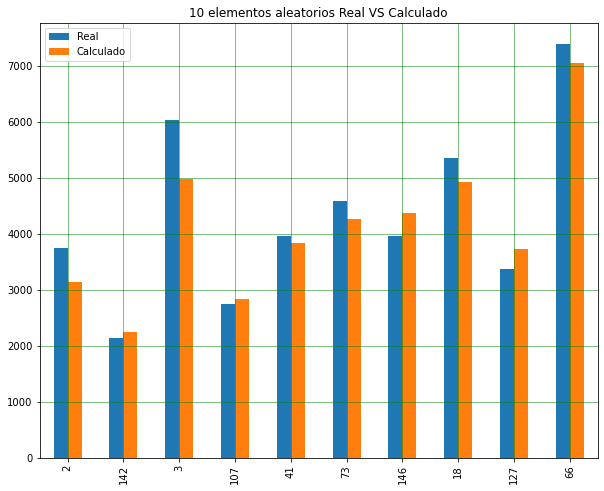

Error medio: 691.3566847340035
Error medio al cuadrado: 900671.1939806789
Raiz del error medio al cuadrado: 949.036982409368


In [69]:
regressor = LinearRegression(normalize=True,positive=True,fit_intercept=False)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

2.7664681127718264e+16
[-3.94598324e+02  7.17811727e+01  1.36711682e+02  4.31689610e+03
  1.04069108e+03 -1.04466163e+03 -2.43310866e+03  2.47749098e+15
  2.47749098e+15  2.47749098e+15  2.47749098e+15 -3.01421721e+16
 -3.01421721e+16 -3.01421721e+16 -6.40000000e+01  1.99812052e+03
 -1.68791549e+01]


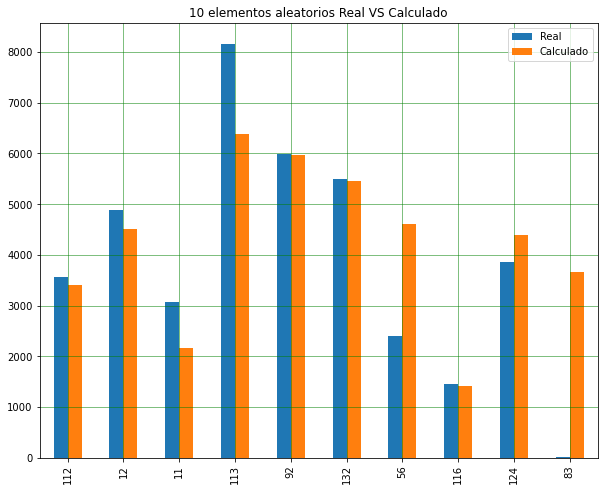

Error medio: 602.9659863945578
Error medio al cuadrado: 651340.5850340136
Raiz del error medio al cuadrado: 807.0567421402374


In [70]:
regressor = LinearRegression(normalize=True,positive=False,fit_intercept=True)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

0.0
[-4.30334626e+02  7.10570723e+01  1.43896933e+02  4.46722528e+03
  8.66988484e+02 -1.01836312e+03 -2.41494140e+03 -3.93403815e+02
  7.87851908e+02  4.35128960e+02  1.31477585e+03  1.48370939e+03
  9.73404262e+02 -3.12760752e+02  2.27373675e-13  1.99859590e+03
 -1.68407025e+01]


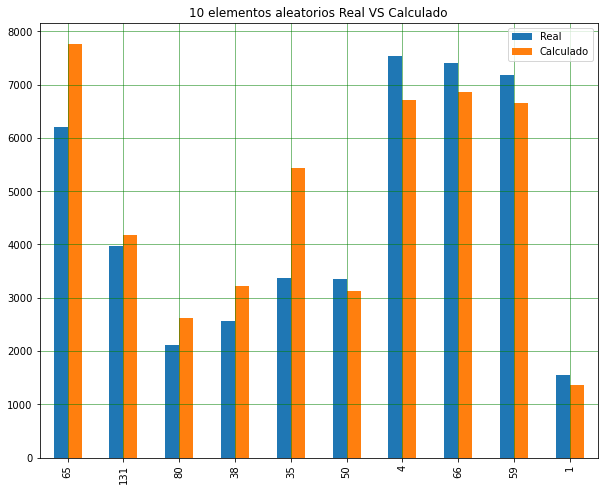

Error medio: 602.153360381629
Error medio al cuadrado: 649865.3625749527
Raiz del error medio al cuadrado: 806.14227191914


In [71]:
regressor = LinearRegression(normalize=True,positive=False,fit_intercept=False)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

-2285.6250028615223
[   0.           79.78249105  186.91352344 3250.24854632 2136.14150574
    0.            0.            0.         1151.86182113  823.1152812
 1610.78343562 2187.54204154 1510.98553554    0.            0.
 2023.56426579    0.        ]


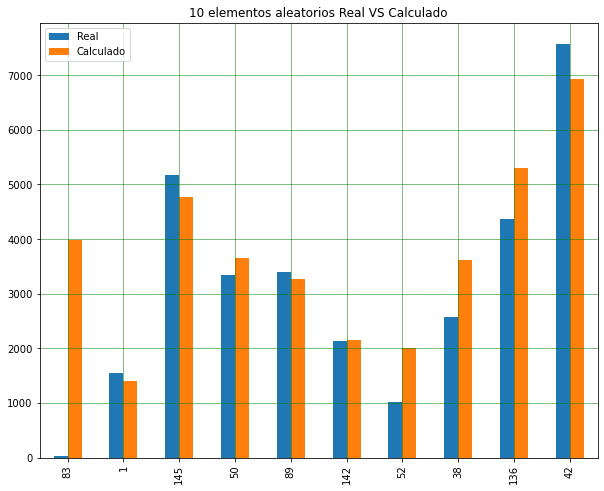

Error medio: 655.1726784481515
Error medio al cuadrado: 748771.6425129627
Raiz del error medio al cuadrado: 865.3159206399491


In [72]:
regressor = LinearRegression(normalize=False,positive=True,fit_intercept=True)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

0.0
[   0.           40.51103239   56.20324745 4018.38710294    0.
    0.            0.            0.         1271.04615086 1089.54014745
 1547.43251884  682.76438919    8.30977926    0.            0.
 1981.80399307    0.        ]


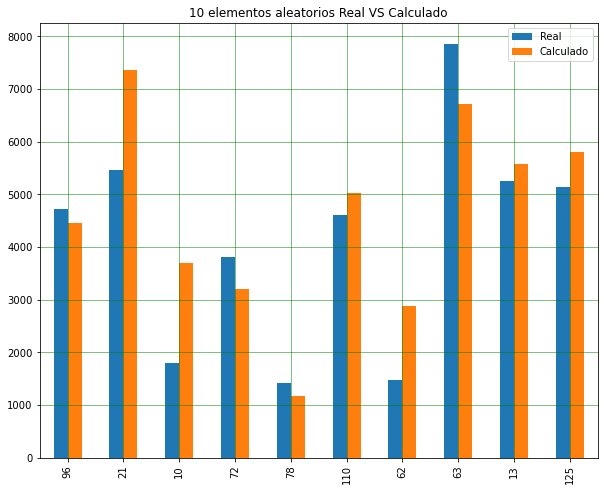

Error medio: 691.3566847340035
Error medio al cuadrado: 900671.1939806789
Raiz del error medio al cuadrado: 949.036982409368


In [73]:
regressor = LinearRegression(normalize=False,positive=True,fit_intercept=False)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

1250.872525111377
[ -430.33462572    71.05707225   143.89693302  4467.22528053
   866.98848363 -1018.36312381 -2414.94139891  -929.49203992
   251.76368262  -100.95926504   778.68762235   768.9250906
   258.61996158 -1027.54505218     0.          1998.59590192
   -16.84070249]


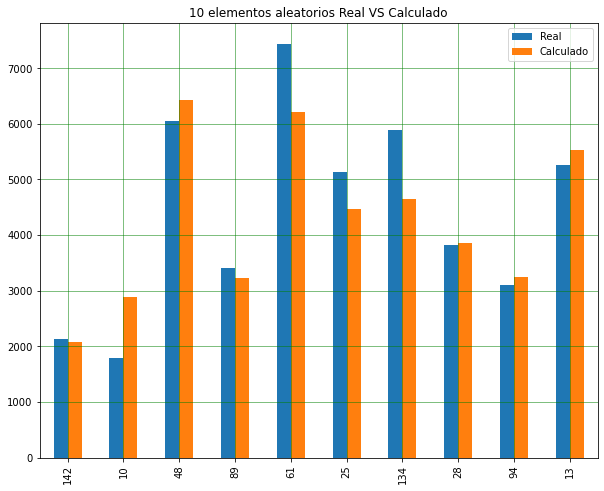

Error medio: 602.1533603816304
Error medio al cuadrado: 649865.3625749524
Raiz del error medio al cuadrado: 806.1422719191398


In [74]:
regressor = LinearRegression(normalize=False,positive=False,fit_intercept=True)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

0.0
[-4.30334626e+02  7.10570723e+01  1.43896933e+02  4.46722528e+03
  8.66988484e+02 -1.01836312e+03 -2.41494140e+03 -3.93403815e+02
  7.87851908e+02  4.35128960e+02  1.31477585e+03  1.48370939e+03
  9.73404262e+02 -3.12760752e+02  2.27373675e-13  1.99859590e+03
 -1.68407025e+01]


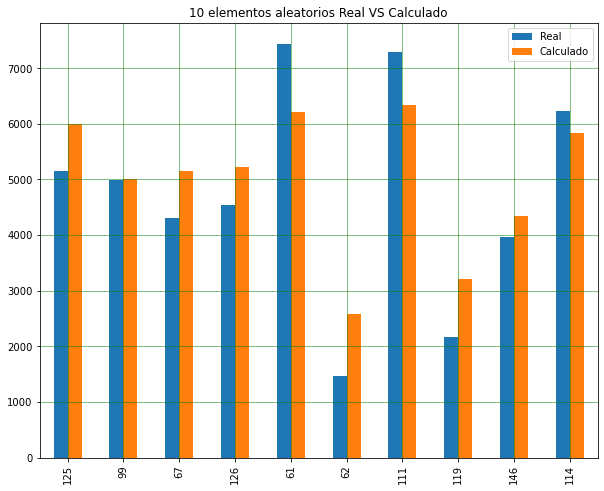

Error medio: 602.153360381629
Error medio al cuadrado: 649865.3625749527
Raiz del error medio al cuadrado: 806.14227191914


In [75]:
regressor = LinearRegression(normalize=False,positive=False,fit_intercept=False)  
regressor.fit(X_train_diario, y_train_diario)
regressor.score(X_train_diario, y_train_diario)
print(regressor.intercept_)
print(regressor.coef_)
y_pred_diario = regressor.predict(X_test_diario)
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))

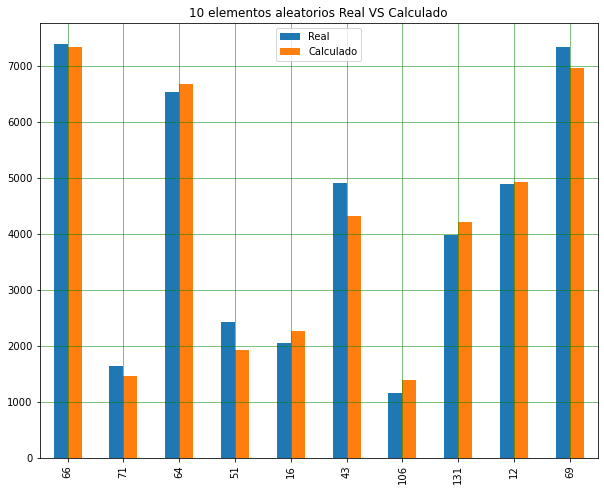

Error medio: 565.7057823129252
Error medio al cuadrado: 871620.0403911564
Raiz del error medio al cuadrado: 933.6059342094803


In [97]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_diario = poly_reg.fit_transform(X_train_diario)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly_diario,y_train_diario)


y_pred_diario = lin_reg2.predict(poly_reg.fit_transform(X_test_diario))
df = pd.DataFrame({'Real': y_test_diario, 'Calculado': y_pred_diario})
df1 = df.sample(n=10)
df1.plot(kind='bar',figsize=(10,8),title='10 elementos aleatorios Real VS Calculado')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print('Error medio:', metrics.mean_absolute_error(y_test_diario, y_pred_diario))  
print('Error medio al cuadrado:', metrics.mean_squared_error(y_test_diario, y_pred_diario))  
print('Raiz del error medio al cuadrado:', np.sqrt(metrics.mean_squared_error(y_test_diario, y_pred_diario)))